ANÁLISIS EXPLORATORIO DE LOS DATOS

In [9]:
# Cargar librerías
import pandas as pd  # Manejo de dataframes


In [2]:
# Cargar datos
df = pd.read_csv("data/df.csv", index_col=0)
df.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,target,retirementDate,retirementType,resignationReason
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,...,0,3.0,4.0,2.0,3.0,3.0,0,NaN,No,No
2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,...,4,3.0,2.0,4.0,2.0,4.0,1,2016-10-15,Resignation,Others
3,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,...,3,2.0,2.0,1.0,3.0,3.0,0,NaN,No,No
4,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,...,5,4.0,4.0,3.0,2.0,3.0,0,NaN,No,No
5,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,...,4,4.0,1.0,3.0,3.0,3.0,0,NaN,No,No


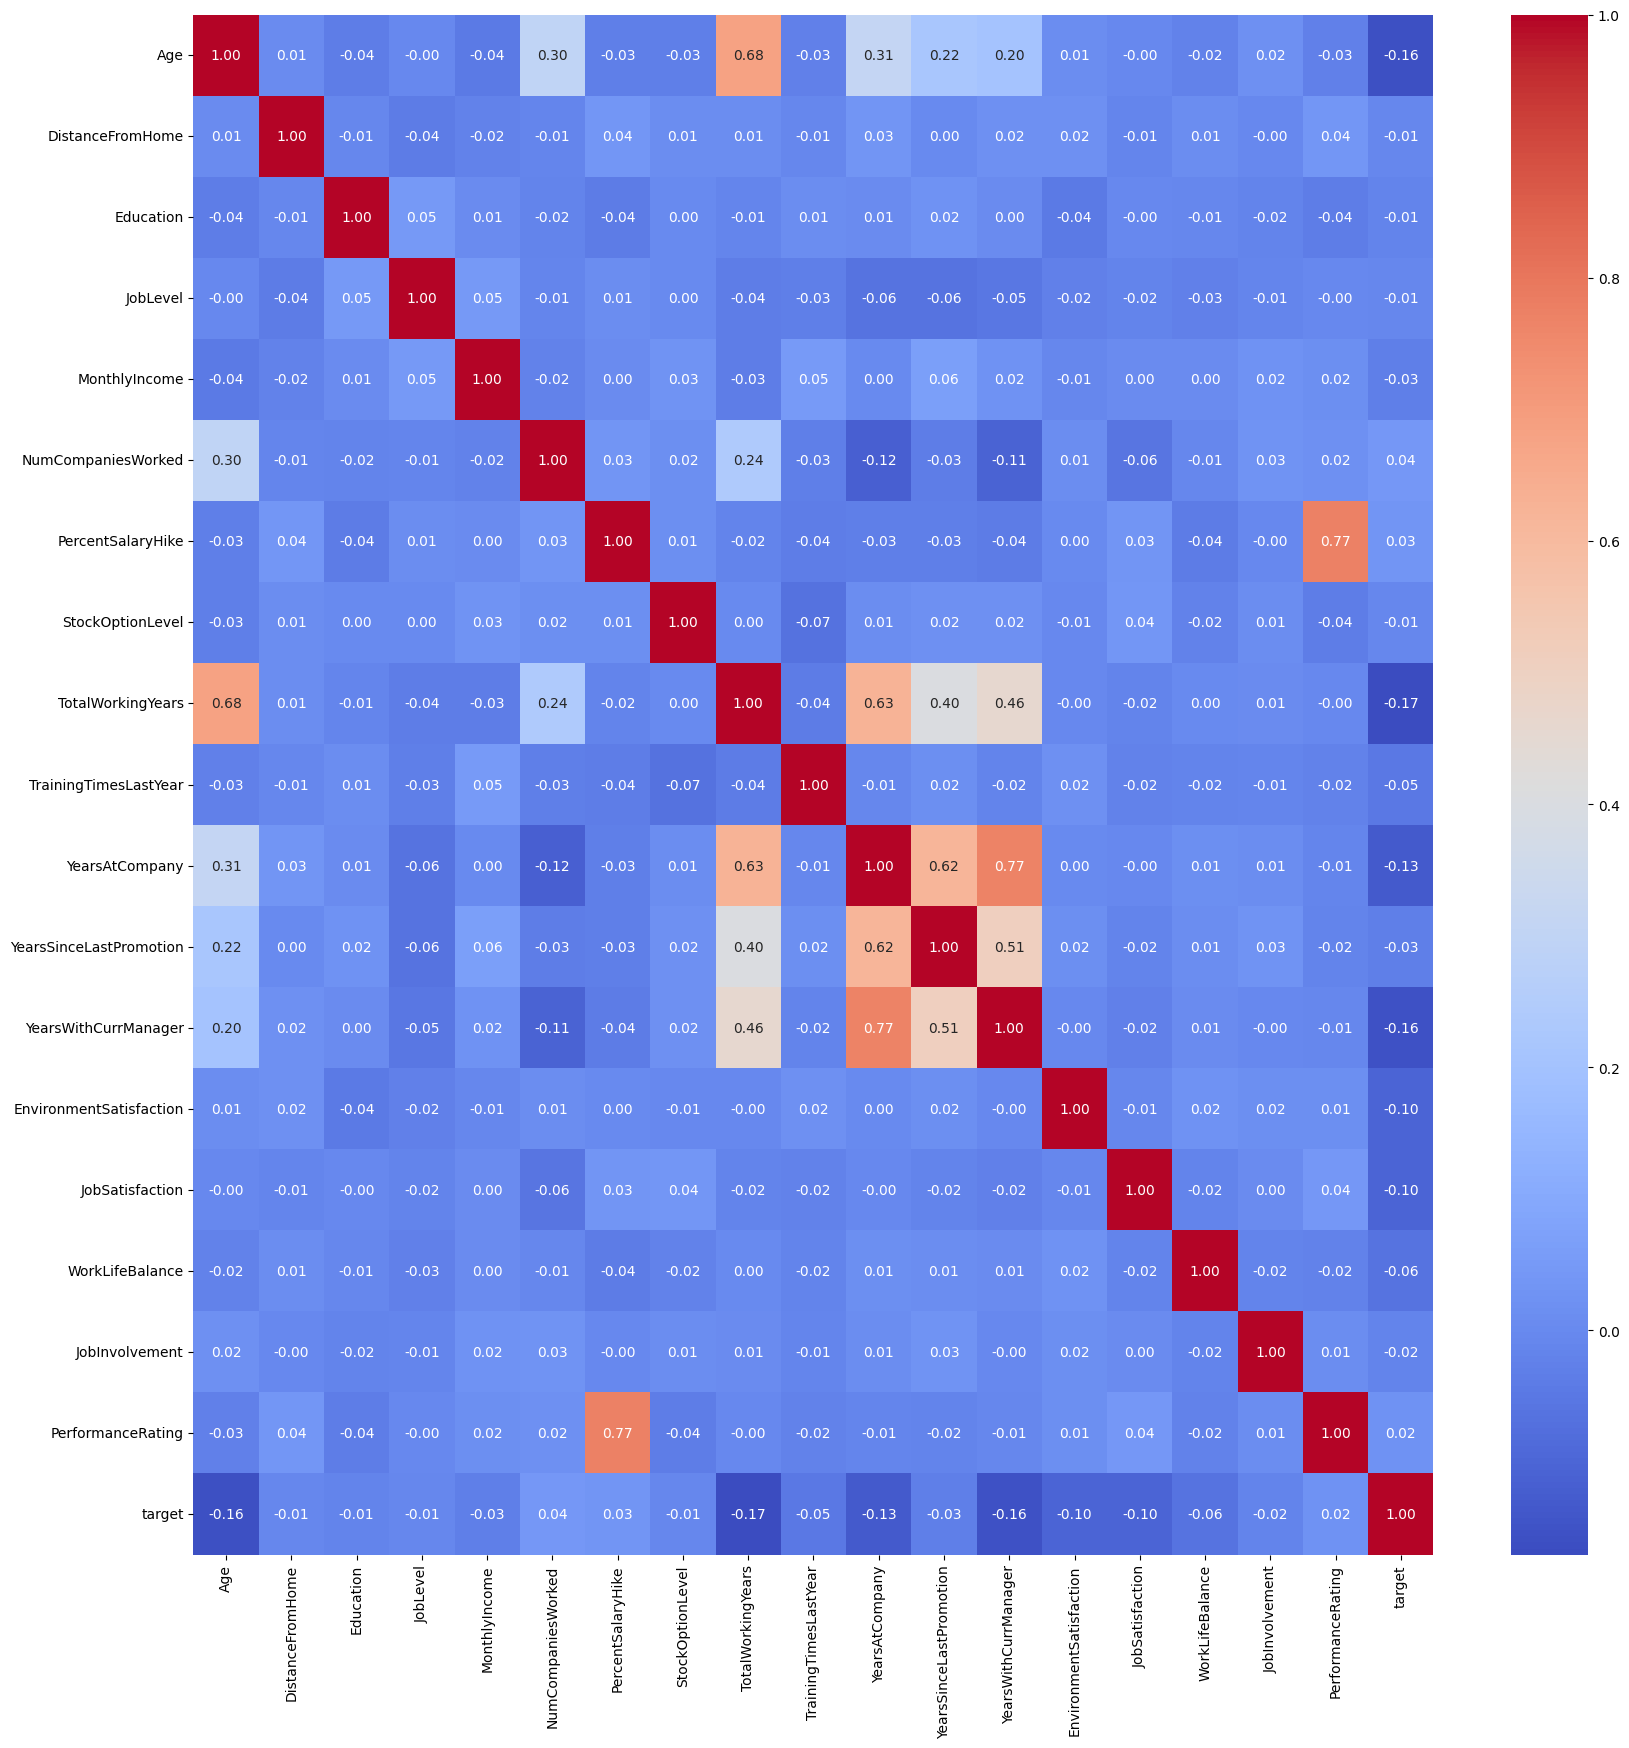

In [4]:
# Matriz de correlación con colores y etiquetas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [5]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,target
count,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000
mean,36.920473,9.190184,2.912293,2.064985,65029.057032,2.681663,15.207453,0.794138,11.279936,2.798228,7.003636,2.188366,4.122927,2.723720,2.727690,2.761003,2.730289,3.153601,0.161100
std,9.139377,8.102578,1.024489,1.107148,47076.746976,2.498682,3.659222,0.852202,7.782222,1.288483,6.123315,3.221407,3.568056,1.089931,1.099394,0.703840,0.710770,0.360607,0.367665
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,7.000000,3.000000,2.000000,49080.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,0.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4401 entries, 1 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4401 non-null   int64  
 1   BusinessTravel           4401 non-null   object 
 2   Department               4401 non-null   object 
 3   DistanceFromHome         4401 non-null   int64  
 4   Education                4401 non-null   int64  
 5   EducationField           4401 non-null   object 
 6   Gender                   4401 non-null   object 
 7   JobLevel                 4401 non-null   int64  
 8   JobRole                  4401 non-null   object 
 9   MaritalStatus            4401 non-null   object 
 10  MonthlyIncome            4401 non-null   int64  
 11  NumCompaniesWorked       4401 non-null   float64
 12  PercentSalaryHike        4401 non-null   int64  
 13  StockOptionLevel         4401 non-null   int64  
 14  TotalWorkingYears        4401

Gráficos de variables

In [18]:
valor=df.columns.values
print(valor)

['Age' 'BusinessTravel' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'Gender' 'JobLevel' 'JobRole' 'MaritalStatus'
 'MonthlyIncome' 'NumCompaniesWorked' 'PercentSalaryHike'
 'StockOptionLevel' 'TotalWorkingYears' 'TrainingTimesLastYear'
 'YearsAtCompany' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'EnvironmentSatisfaction' 'JobSatisfaction' 'WorkLifeBalance'
 'JobInvolvement' 'PerformanceRating' 'target' 'retirementDate'
 'retirementType' 'resignationReason']


In [19]:
for i in valor:
  print(df.value_counts(i))
  print("----------------")

Age
35    233
34    231
31    207
36    206
29    204
32    183
30    180
38    174
33    174
40    170
37    149
27    144
28    143
42    137
39    125
45    123
41    120
26    117
44     99
46     99
43     95
50     90
24     78
25     78
49     72
47     71
55     66
53     57
48     57
51     57
52     54
54     54
22     48
56     42
23     42
58     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: count, dtype: int64
----------------
BusinessTravel
Travel_Rarely        3123
Travel_Frequently     829
Non-Travel            449
Name: count, dtype: int64
----------------
Department
Research & Development    2877
Sales                     1336
Human Resources            188
Name: count, dtype: int64
----------------
DistanceFromHome
2     632
1     623
10    258
9     255
3     252
7     252
8     240
5     194
4     190
6     177
16     96
11     87
24     84
29     81
23     80
18     78
15     78
20     75
25     75
26     75
28     68
19     66
14 

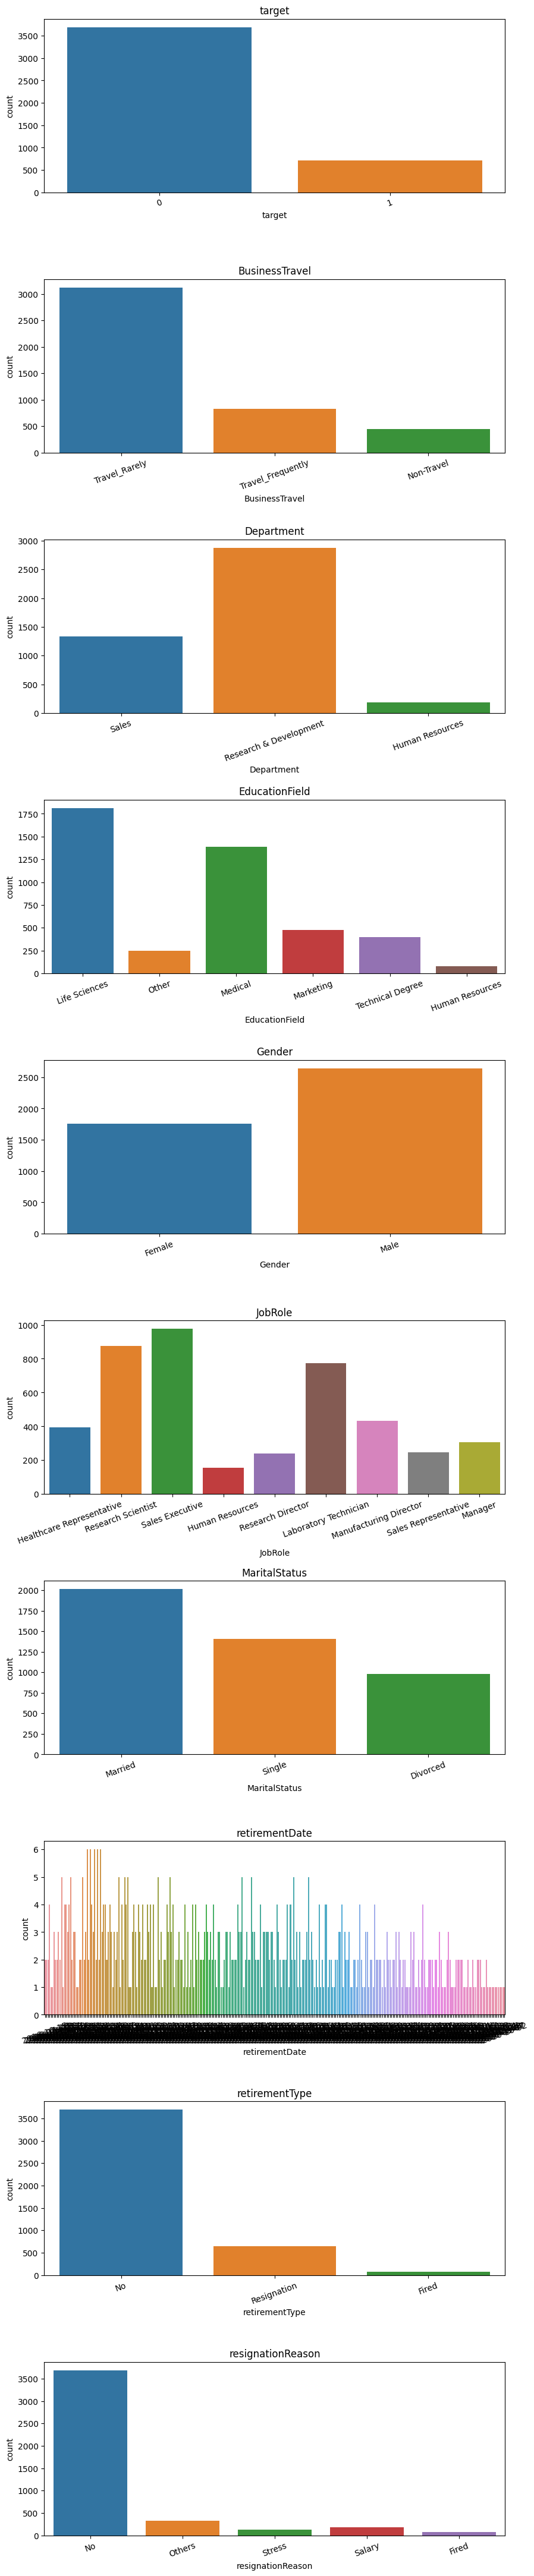

In [31]:
categoricas = ['target','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','retirementDate','retirementType','resignationReason']


# Realizamos gráficos de barras para el conteo de categorías

fig, ax = plt.subplots(nrows= len(categoricas), ncols=1, figsize=(10,55))
fig.subplots_adjust(hspace=0.5)

for i, colum in enumerate(categoricas):
  sns.countplot(x=colum,data=df,ax=ax[i])
  ax[i].set_title(colum)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=20)

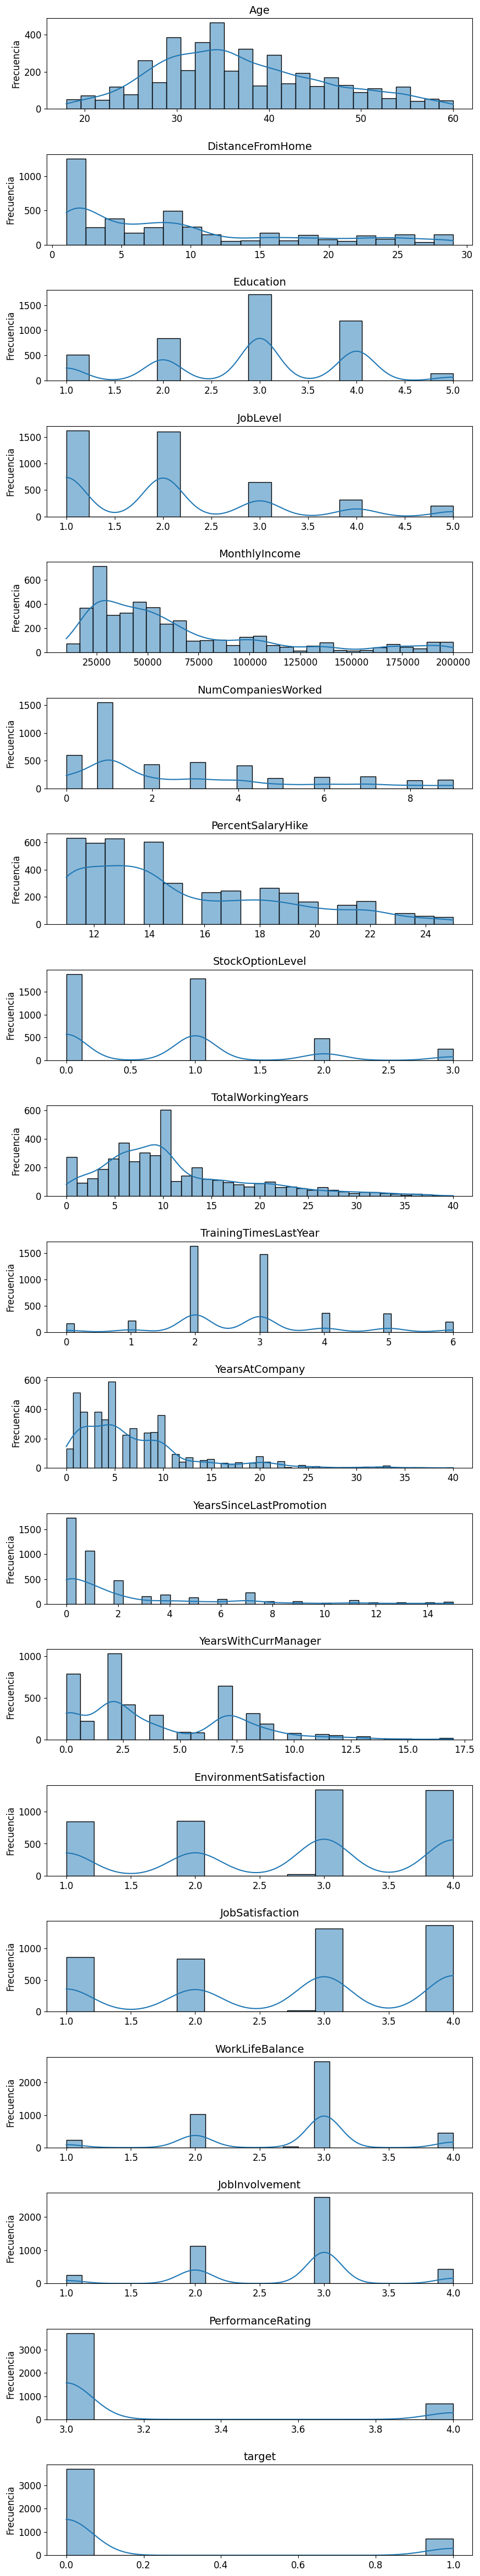

In [34]:
numericas = ['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating',
             'target']
             
fig, ax = plt.subplots(nrows=len(numericas), ncols=1, figsize=(10, 60))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numericas):
    sns.histplot(x=column, data=df, ax=ax[i], kde=True)
    ax[i].set_title(column, fontsize=14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frecuencia', fontsize=12)
    ax[i].tick_params(axis='both', labelsize=12)
    
plt.show()